# 1.1 Overview of Time Series Characteristics

In [11]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
import seaborn as sns

jtplot.style(figsize=(15, 9))

## Sample #1

### Data

In [2]:
df_quakes = pd.read_csv('https://online.stat.psu.edu/stat510/sites/stat510/files/L01/quakes.dat',
                        delim_whitespace=True, header=None)
df_quakes

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,13,14,8,10,16,26,32,27,18,32.0,36.0,24.0,22.0,23.0,22.0
1,18,25,21,21,14,8,11,14,23,18.0,17.0,19.0,20.0,22.0,19.0
2,13,26,13,14,22,24,21,22,26,21.0,23.0,24.0,27.0,41.0,31.0
3,27,35,26,28,36,39,21,17,22,17.0,19.0,15.0,34.0,10.0,15.0
4,22,18,15,20,15,22,19,16,30,27.0,29.0,23.0,20.0,16.0,21.0
5,21,25,16,18,15,18,14,10,15,8.0,15.0,6.0,11.0,8.0,7.0
6,13,10,23,16,15,25,22,20,16,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_quakes = pd.concat([df_quakes.loc[i] for i in range(0, 7)], ignore_index=True)
df_quakes.dropna(inplace=True)
df_quakes[:5]

0    13.0
1    14.0
2     8.0
3    10.0
4    16.0
dtype: float64

In [4]:
# df_cmort = pd.read_csv('https://online.stat.psu.edu/stat510/sites/stat510/files/L01/cmort.dat',
#                        delim_whitespace=True, header=None)
# df_cmort.head()

### Visualization

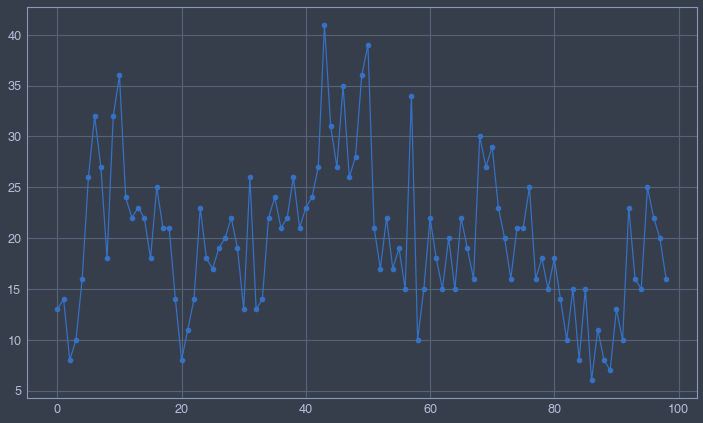

In [16]:
plt.plot(df_quakes, 'o-b')

### AR(1)

In [30]:
df_quakes_lag1 = pd.DataFrame(data=df_quakes)
df_quakes_lag1.rename(columns={0: 'X_t'}, inplace=True)
df_quakes_lag1['X_t-1'] = df_quakes_lag1['X_t'].shift(1)
df_quakes_lag1.head(10)

,X_t,X_t-1
0,13.0,NaN
1,14.0,13.0
2,8.0,14.0
3,10.0,8.0
4,16.0,10.0
5,26.0,16.0
6,32.0,26.0
7,27.0,32.0
8,18.0,27.0
9,32.0,18.0


<AxesSubplot:xlabel='X_t', ylabel='X_t-1'>

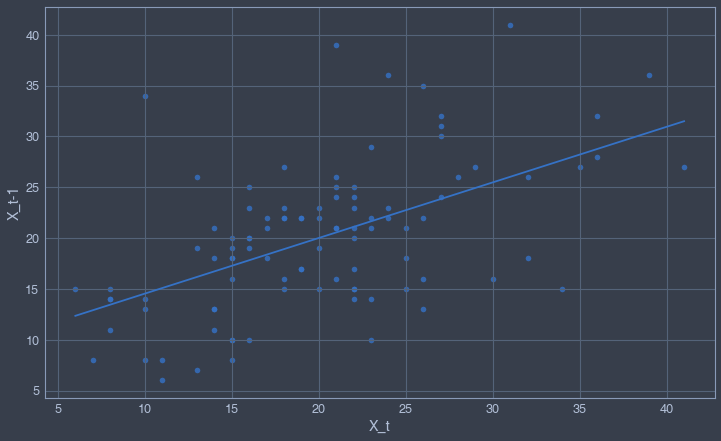

In [50]:
sns.regplot(data=df_quakes_lag1, x='X_t',  y='X_t-1', ci=None)

In [53]:
params = AutoReg(df_quakes, lags=1, old_names=True)
res = params.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                   99
Model:                     AutoReg(1)   Log Likelihood                -315.617
Method:               Conditional MLE   S.D. of innovations              6.060
Date:                Mon, 16 Sep 2024   AIC                              3.665
Time:                        21:38:34   BIC                              3.744
Sample:                             1   HQIC                             3.697
                                   99                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.1907      1.801      5.104      0.000       5.662      12.720
y.L1           0.5434      0.084      6.438      0.000       0.378       0.709
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8403           +0.0000j            1.8403            0.0000
-----------------------------------------------------------------------------
"""

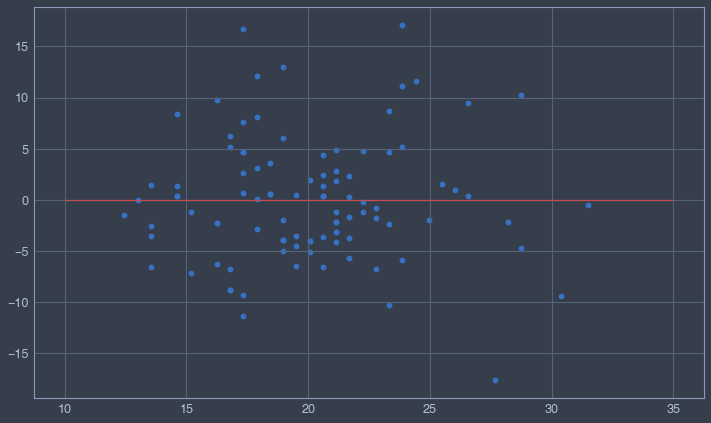

In [77]:
plt.scatter(res.fittedvalues, res.resid)
plt.hlines(0, 10, 35, colors='r')

## Sample 2

### Data

In [29]:
au_beer = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Practical-Time-Series-Analysis/master/Data%20Files/quarterly-beer-production-in-aus-March%201956-June%201994.csv',
                      index_col=0)
au_beer = au_beer.loc['1956Q1':'1974Q4']
au_beer.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994': 'Beer'}, inplace=True)
au_beer.head()

,Beer
Quarter,
1956Q1,284.4
1956Q2,212.8
1956Q3,226.9
1956Q4,308.4
1957Q1,262.0


In [30]:
au_beer.index = pd.to_datetime(au_beer.index)
au_beer.index = pd.PeriodIndex(au_beer.index, freq='Q')
au_beer.index

PeriodIndex(['1956Q1', '1956Q2', '1956Q3', '1956Q4', '1957Q1', '1957Q2',
             '1957Q3', '1957Q4', '1958Q1', '1958Q2', '1958Q3', '1958Q4',
             '1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2', '1961Q3', '1961Q4',
             '1962Q1', '1962Q2', '1962Q3', '1962Q4', '1963Q1', '1963Q2',
             '1963Q3', '1963Q4', '1964Q1', '1964Q2', '1964Q3', '1964Q4',
             '1965Q1', '1965Q2', '1965Q3', '1965Q4', '1966Q1', '1966Q2',
             '1966Q3', '1966Q4', '1967Q1', '1967Q2', '1967Q3', '1967Q4',
             '1968Q1', '1968Q2', '1968Q3', '1968Q4', '1969Q1', '1969Q2',
             '1969Q3', '1969Q4', '1970Q1', '1970Q2', '1970Q3', '1970Q4',
             '1971Q1', '1971Q2', '1971Q3', '1971Q4', '1972Q1', '1972Q2',
             '1972Q3', '1972Q4', '1973Q1', '1973Q2', '1973Q3', '1973Q4',
             '1974Q1', '1974Q2', '1974Q3', '1974Q4'],
            dtype='period[Q-DEC]', name='Quarter')

### Visualization

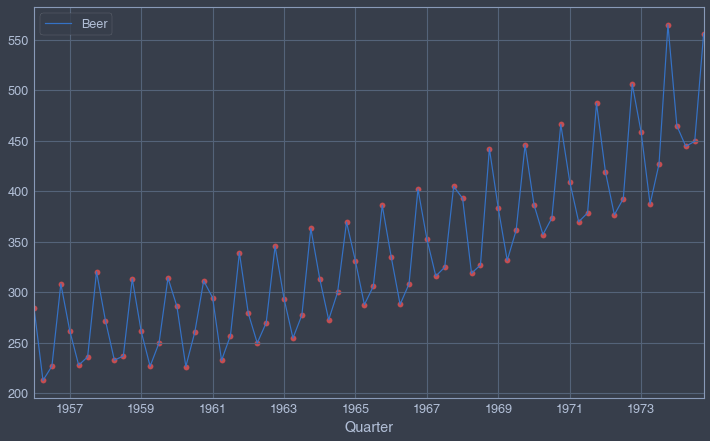

In [32]:
fig, ax = plt.subplots(1)
au_beer.plot(ax=ax)
ax.scatter(au_beer.index, au_beer, color='r')

### AR(1)

In [19]:
au_beer_lag1 = pd.DataFrame(data=au_beer)
au_beer_lag1.rename(columns={'Beer': 'X_t'}, inplace=True)
au_beer_lag1['X_t-1'] = au_beer_lag1['X_t'].shift(1)
au_beer_lag1.head(10)

,X_t,X_t-1
Quarter,,
1956Q1,284.4,NaN
1956Q2,212.8,284.4
1956Q3,226.9,212.8
1956Q4,308.4,226.9
1957Q1,262.0,308.4
1957Q2,227.9,262.0
1957Q3,236.1,227.9
1957Q4,320.4,236.1
1958Q1,271.9,320.4


<AxesSubplot:xlabel='X_t', ylabel='X_t-1'>

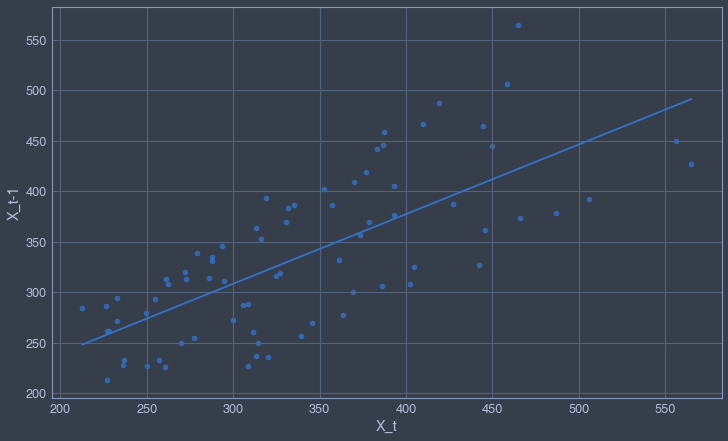

In [20]:
sns.regplot(data=au_beer_lag1, x='X_t',  y='X_t-1', ci=None)

In [23]:
stat_test = adfuller(df_quakes, autolag='AIC')
print(f'Test Statistic: {stat_test[0]}\np_value: {stat_test[1]}\nCritical Values: {stat_test[4]}')

Test Statistic: -3.183192251191782
p_value: 0.02097842525600371
Critical Values: {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


In [12]:
stat_test = adfuller(df_cmort, autolag='AIC')
print(f'Test Statistic: {stat_test[0]}\np_value: {stat_test[1]}\nCritical Values: {stat_test[4]}')

Test Statistic: -4.815687630710125
p_value: 5.074987511904784e-05
Critical Values: {'1%': -3.443339692005083, '5%': -2.8672689011327894, '10%': -2.569821287318971}
